<a href="https://colab.research.google.com/github/oaboelfetouh/tutorials/blob/main/Titanic_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/titanic-passengers.csv", sep = ';')
df.head()

#our objective is (Survived)
#So, we are trying to analize the data-columns that affect it.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
df.drop(['PassengerId', 'Name','Ticket','Cabin','Embarked'], axis = 1, inplace = True)
# those guys apparently (bu logic) do not affect the paasenger survival.

In [4]:
df.head() # :))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,No,2,male,28.0,0,0,13.0000
1,No,3,male,25.0,0,0,7.6500
2,No,3,male,20.0,0,0,7.8542
3,No,3,female,29.0,0,4,21.0750
4,No,1,male,31.0,1,0,52.0000


Time to ask some questions:
- what is the ratio between women and men who survived?
- does the class affects the survival, and how?
- chech the age and the average survival
- Session Task : chech the relation between Fare and Survived

# Data preprocessing

ValueError: ignored

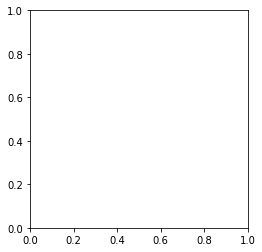

In [5]:
# to get the ratio between women and men who survived...
# use a pie chart! 

# grab-out the data with (survived = Yes
survived_df = df.loc[df['Survived']== 'Yes'] #very very very very important :)
plt.pie(survived_df.Sex)
# IT raised an error! - could not convert string to float: 'female'


Now we have an interesting task, we have to convert all the data into numerical data in order to use it + Some CLEANING !

In [6]:
df.isnull().sum()
# as we can see, lots of 'age' data is missing, se we have to fill it with sth!

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [7]:
df["Age"].fillna(df["Age"].mode(),inplace = True) #IMPORTANT!
# df['Age'].mode() -> we are filling the NAN-s with the mode of the data!

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

df["Survived"]=LabelEncoder().fit_transform(df["Survived"])
df["Sex"]=LabelEncoder().fit_transform(df["Sex"])

#Survived : 0 = No , 1 = Yes
#Sex : 0 ; Female , 1 = Male

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,28.0,0,0,13.0000
1,0,3,1,25.0,0,0,7.6500
2,0,3,1,20.0,0,0,7.8542
3,0,3,0,29.0,0,4,21.0750
4,0,1,1,31.0,1,0,52.0000


SO, the Pre-Processing we have to do is 

1- Check and replace tha NAN-s

2- Encode the categorical data into numerical data

# To get the ratio between women and men who survived...

0    233
1    109
Name: Sex, dtype: int64


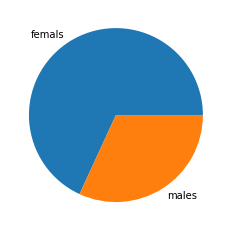

In [9]:
# to get the ratio between women and men who survived...
# use a pie chart! 

# grab-out the data with (survived = Yes
survived_df = df.loc[df['Survived']== 1] #very very very very important :)
print(survived_df['Sex'].value_counts())
plt.pie(survived_df['Sex'].value_counts(), labels = ['femals','males'])

plt.show()

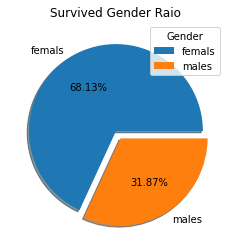

In [10]:
# nicer graph
plt.title('Survived Gender Raio')
plt.pie(survived_df['Sex'].value_counts(), labels = ['femals','males'],
        explode = [0,0.1], shadow = True,
        autopct='%1.2f%%')  # I copied this autopct='%1.2f%%' - to show the percentage

plt.legend(title = 'Gender')
plt.show()

# does the class affects the Survival and how ?


In [11]:
# does the class affects the Survivals and how ?

# to answer this let's costruct seperate dataframes for the No-survived and Survived
survived_df = df.loc[df['Survived']== 1] #very very very very important :)
no_survived_df = df.loc[df['Survived']== 0] #very very very very important :)

no_survived_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,2,1,28.0,0,0,13.0000
1,0,3,1,25.0,0,0,7.6500
2,0,3,1,20.0,0,0,7.8542
3,0,3,0,29.0,0,4,21.0750
4,0,1,1,31.0,1,0,52.0000


In [12]:
# construct a df for survived and no-survived for each p-class
df_no= no_survived_df[['Pclass','Survived']].groupby(['Pclass']).count()
df_yes= survived_df[['Pclass','Survived']].groupby(['Pclass']).count()


        Survived
Pclass          
1             80
2             97
3            372


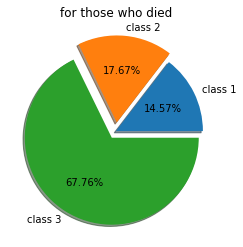

In [13]:
print(df_no)
plt.title("for those who died")
plt.pie(df_no.Survived , labels = ['class 1','class 2', 'class 3'],
        explode = [0,0.1,0.09], shadow = True,
        autopct='%1.2f%%')
plt.show()



        Survived
Pclass          
1            136
2             87
3            119


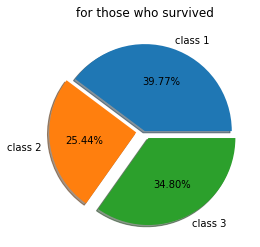

In [14]:
print(df_yes)
plt.title("for those who survived")
plt.pie(df_yes.Survived , labels = ['class 1','class 2', 'class 3'],
        explode = [0,0.1,0.09], shadow = True,
        autopct='%1.2f%%')
plt.show()